In [15]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)

In [48]:
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


### Feature Normalization

In [49]:
## TODO : remove NAN before standardization, or at least not consider them in np.mean() and np.std.
tx_nan = transform_to_nan(tx, -900)
tx_nan_norm, mean_x, std_x = standardize_with_nan(tx_nan)

#log des distributions exponentielles (ex feature3)
tx_nan_norm_adjusted = tx_nan_norm
features = [0, 2, 3, 5, 9, 13, 16, 23, 29]
for i in features:
    feature = tx_nan_norm_adjusted[:,i] + abs(np.min(tx_nan_norm_adjusted[:,i])) + 0.1 #pour enlever les valeurs négatives
    logfeature = log(feature)
    tx_nan_norm_adjusted[:, i] = logfeature

### Feature Distribution

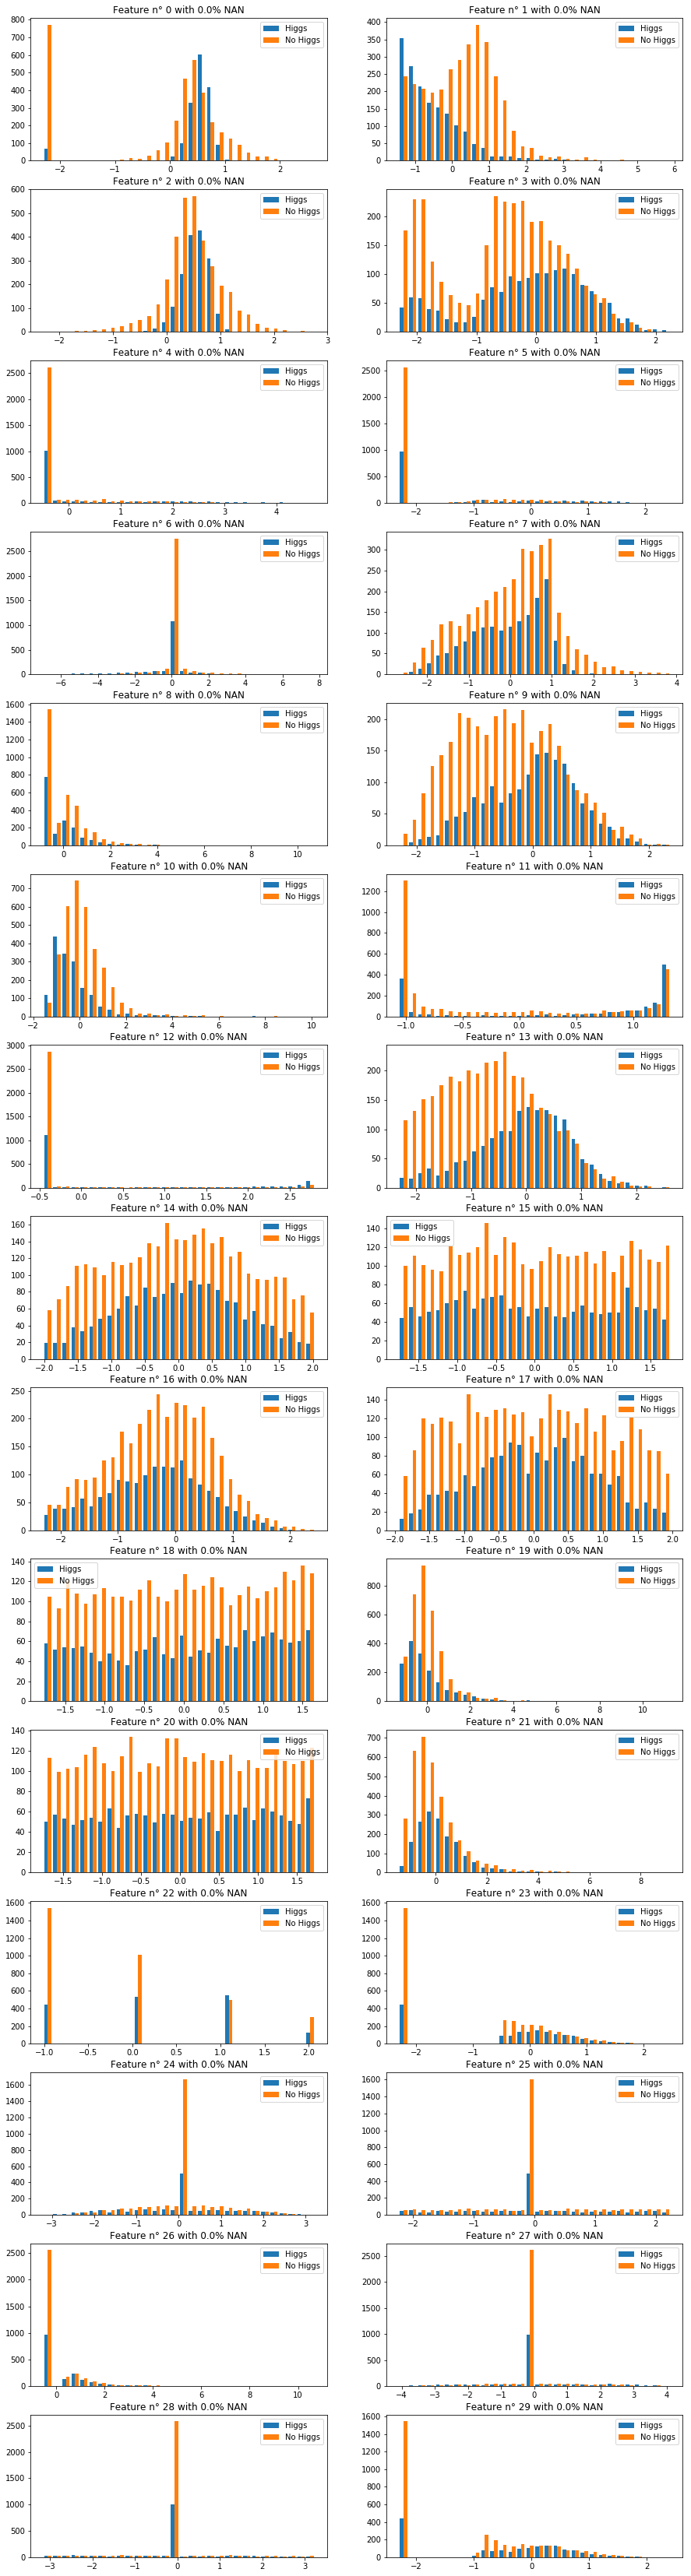

In [50]:
display_feature_distribution(y, tx_nan_norm, 30)

#### Missing Data

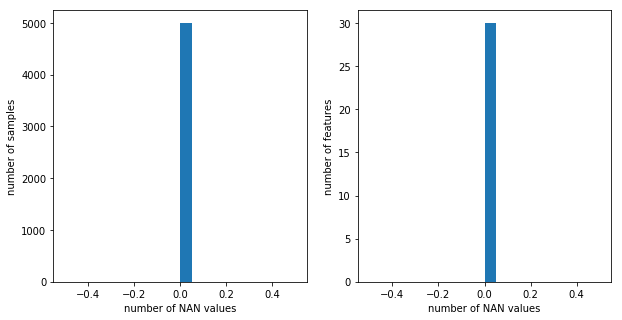

In [51]:
NAN_values_overview(tx_nan_norm, 20)

### Clean Dataset

With a first glance at the data set we see that some features are almost entirely filled with missing data. Lets say the we remove features and samples with more thant 30% of missing values

In [52]:
tx_nan_norm.shape

(5000, 30)

In [53]:
tx_cleaned = tx_nan_norm[:, ~np.isnan(tx_nan_norm).any(axis=0)]
tx_cleaned.shape

(5000, 30)



### Train model 

#### Least Square Gradient Descent
Linear regression using gradient descent

In [66]:
#initialise le w initial à 30 dim à 0
initial_w_gd = np.zeros(30)
max_iters = 100
gamma = 0.16
gd_losses, gd_ws = gradient_descent(y, tx_cleaned, initial_w_gd, max_iters, gamma)

Gradient Descent(0/99): loss=1.0, w0=0.04043191813400578, w1=-0.053623058553363155
Gradient Descent(1/99): loss=0.7254916428221115, w0=0.04422591792529322, w1=-0.06625486577999437
Gradient Descent(2/99): loss=0.8949615051495646, w0=0.06697686727498857, w1=-0.0997477090377082
Gradient Descent(3/99): loss=0.6987022071242284, w0=0.06205661883307177, w1=-0.10235463665098908
Gradient Descent(4/99): loss=0.8381089899843716, w0=0.07614050128328306, w1=-0.12591778756409042
Gradient Descent(5/99): loss=0.6864974050443763, w0=0.06811505131043605, w1=-0.12476360541365954
Gradient Descent(6/99): loss=0.8040372455608283, w0=0.0776782206654355, w1=-0.14296310244788624
Gradient Descent(7/99): loss=0.6786471504063746, w0=0.06895846645032057, w1=-0.1406583227822245
Gradient Descent(8/99): loss=0.780599542160537, w0=0.07595511963928393, w1=-0.1555931817296018
Gradient Descent(9/99): loss=0.6731751841041389, w0=0.06753634257068841, w1=-0.15317925093916057
Gradient Descent(10/99): loss=0.7629081829935113,

#### Least Square Stochastic Gradient Descent
Linear regression using stochastic gradient descent

In [70]:
#initialise le w initial à 30 dim à 0
initial_w_sgd = np.zeros(30)
max_iters_sgd = 100
gamma_sgd = 0.16
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx_cleaned, initial_w_sgd, max_iters_sgd, gamma_sgd)

TypeError: stochastic_gradient_descent() missing 1 required positional argument: 'gamma'

#### Least Square
Least squares regression using normal equations

#### Ridge Regression
Ridge regression using normal equations

#### Logistic Regression
Logistic regression using gradient descent or SGD

#### Reg Logistic Regression
Regularized logistic regression using gradient descent
or SGD